In [ ]:
# K-NN Classification 예제
# iris.csv

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# 0. CSV 파일 불러오기
file_path = "C:/AI/iris.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 1. 데이터 전처리 (X: 특성, y: 타겟)
X = df.drop(columns=["Name"])
y = df["Name"]

# 2. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 데이터 정규화 (K-NN은 거리 기반이므로 정규화가 중요!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. K-NN 모델 학습 (K=2)
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
y_pred_class = knn_clf.predict(X_test)
print("K-NN Classification 예측 결과:", y_pred_class)

accuracy = knn.score(X_test, y_test)
print(f"K-NN Classification 정확도: {accuracy:.2f}")

K-NN Classification 예측 결과: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
K-NN Classification 정확도: 0.33


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# K-NN Regression 예제
# iris.csv

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')
Mean Squared Error (MSE): 0.0000
R-squared Score (R²): 1.0000


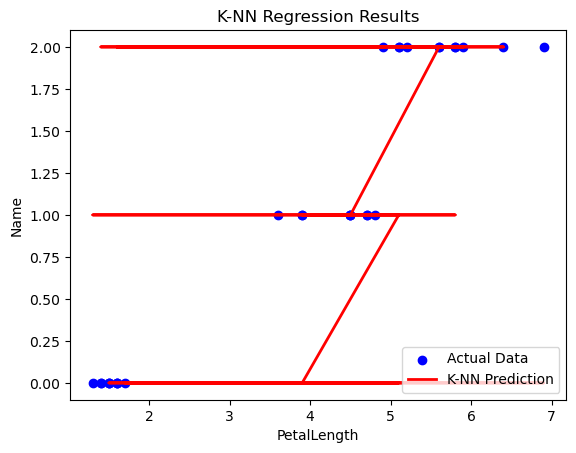

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 0. CSV 파일 불러오기
file_path = "C:/AI/iris.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 1. 데이터 전처리 (X: 특성, y: 타겟)
df = df.dropna()
X = df.drop(columns=["Name"])
print(X.columns)
encoder = LabelEncoder()
y = encoder.fit_transform(df['Name'])

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. K-NN 회귀 모델 학습 (K=2)
knn_regressor = KNeighborsRegressor(n_neighbors=2)
knn_regressor.fit(X_train, y_train)

# 4. 예측 수행
y_pred = knn_regressor.predict(X_test)

# 5. 평가 (MSE, R^2 Score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")

# 5. 시각화
# X_test 정렬 (그래프 그리기 위함)
X_test_sorted = np.array(X_test['PetalLength']).reshape(-1, 1)
y_pred_sorted = y_pred[np.argsort(X_test_sorted, axis=0).reshape(-1)]

# 실제 값과 예측 값 비교
plt.scatter(X_test['PetalLength'], y_test, color="blue", label="Actual Data")  # 실제 값
plt.plot(X_test_sorted, y_pred_sorted, color="red", linewidth=2, label="K-NN Prediction")  # 예측 값
plt.xlabel("PetalLength")
plt.ylabel("Name")
plt.legend()
plt.title("K-NN Regression Results")
plt.show()

In [30]:
# 최적의 K-값 찾기

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 0. CSV 파일 불러오기
file_path = "C:/AI/iris.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 1. 데이터 전처리 (X: 특성, y: 타겟)
X = df.drop(columns=["Name"]) 
y = df["Name"]

# 2. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 3. 여러 개의 K 값 평가
k_values = range(1, 21)  # K값 범위 설정
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # K-NN 모델 생성
    knn.fit(X_train, y_train)  # 학습
    y_pred = knn.predict(X_test)  # 예측
    accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
    scores.append(accuracy)

# 최적의 K 값 찾기
best_k = k_values[np.argmax(scores)]
print(f"최적의 K 값: {best_k}")

최적의 K 값: 1
